In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


**Domain Knowledge**

**Age**: This is the age of the patient. Age is a crucial factor in disease prognosis as the risk of chronic conditions such as heart disease, cancer, diabetes, and arthritis increases with age. This is due to various factors including the cumulative effect of exposure to risk factors, increased wear and tear on the body, and changes in the body's physiological functions.

**Sex:** This feature represents the gender of the patient. Gender can influence disease prognosis due to biological differences and gender-specific lifestyle patterns. For instance, heart disease is more common in males, while skin cancer is more common in females. This could be due to factors like longer life expectancy or different exposure to risk factors in each gender.

**General_Health**: This is a self-rated health status of the patient. Patients who perceive their health as "Poor" or "Fair" are more likely to have chronic conditions. This could be because the symptoms or management of these conditions impact their perceived health status.

**Checkup**: This feature represents the frequency of health checkups. Regular health checkups can help in early detection and management of diseases, thereby improving the prognosis.

**Exercise**: This feature indicates whether the patient exercises regularly or not. Regular exercise can help control weight, reduce risk of heart diseases, and manage blood sugar and insulin levels, among other benefits. This aligns with the negative correlation observed between exercise and diseases such as heart disease, diabetes, and arthritis.

**Smoking_History**: This feature indicates whether the patient has a history of smoking. Smoking can increase disease risk as it can damage blood vessels, increase blood pressure, and reduce the amount of oxygen reaching the organs.

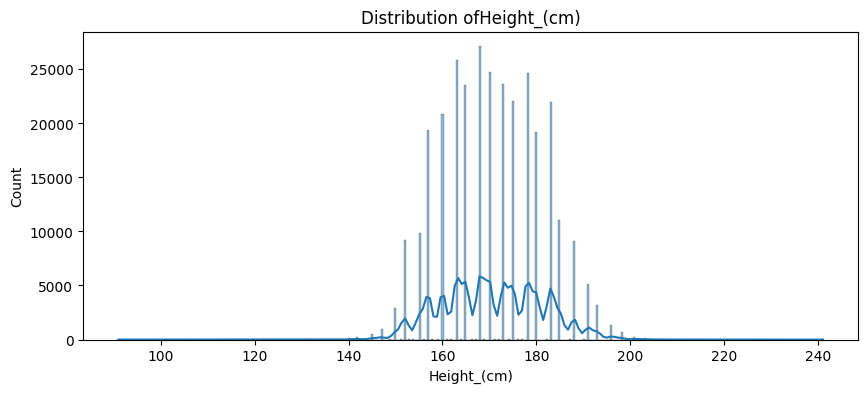

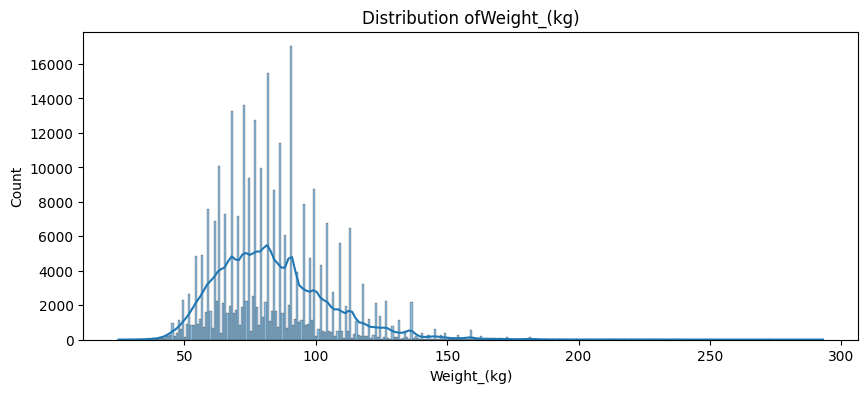

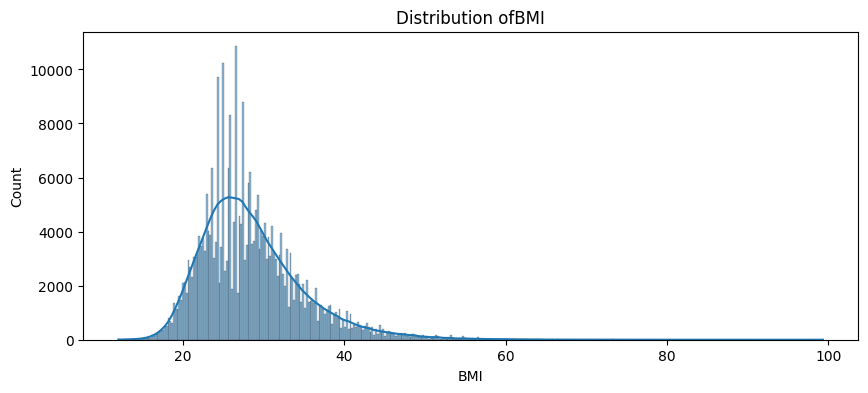

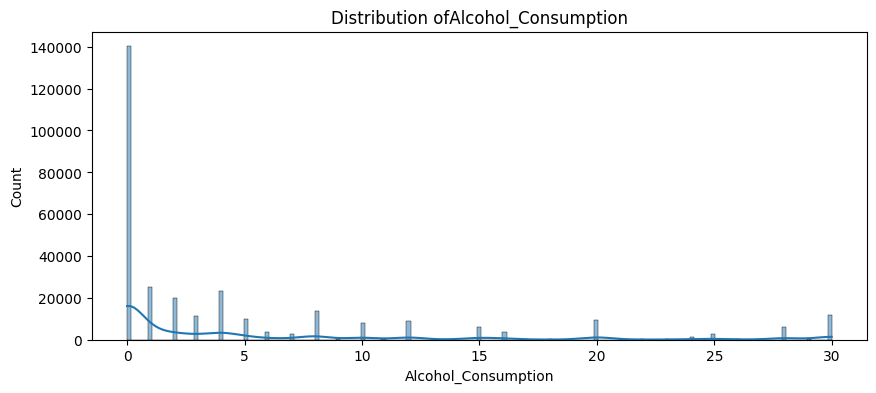

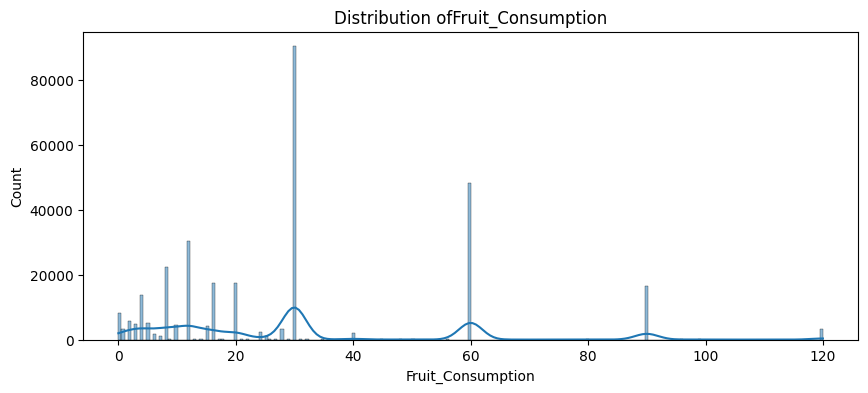

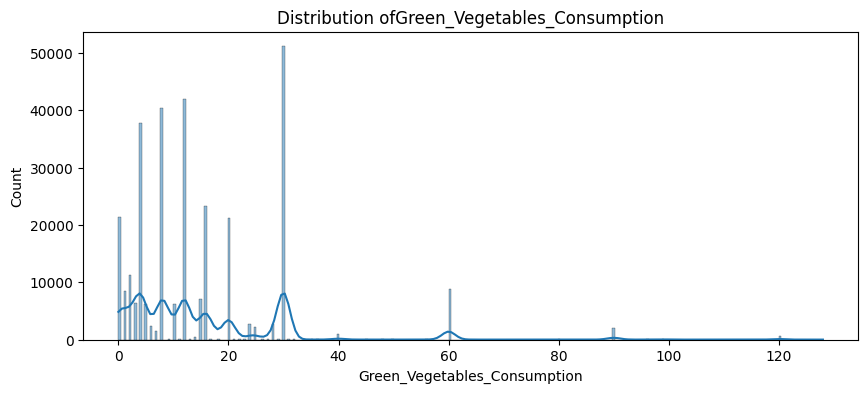

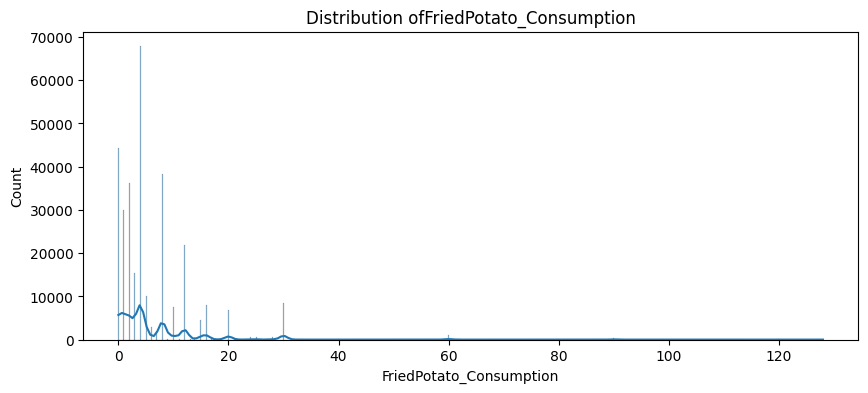

In [3]:
# exploratory data analysis
# univariate analysis
# check the distribution of numerical features
numerical_features=['Height_(cm)', 'Weight_(kg)','BMI','Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for feature in numerical_features:
  plt.figure(figsize=(10,4))
  sns.histplot(data=data, x=feature, kde=True)
  plt.title('Distribution of' +feature)
  plt.show()

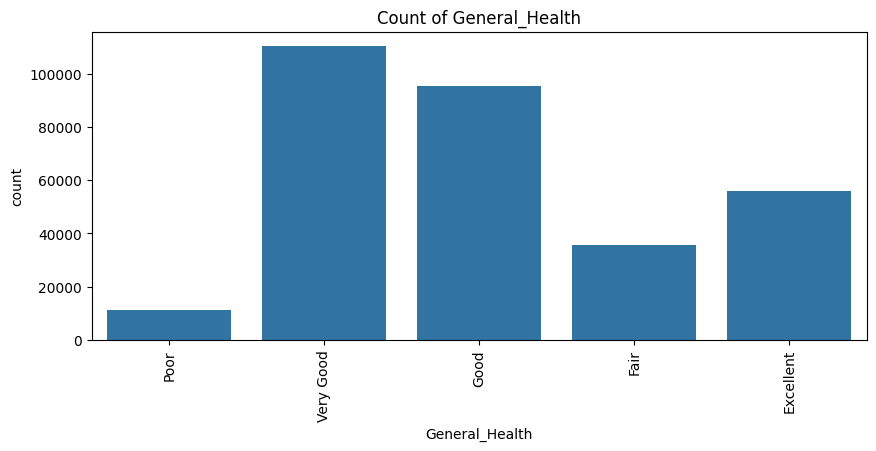

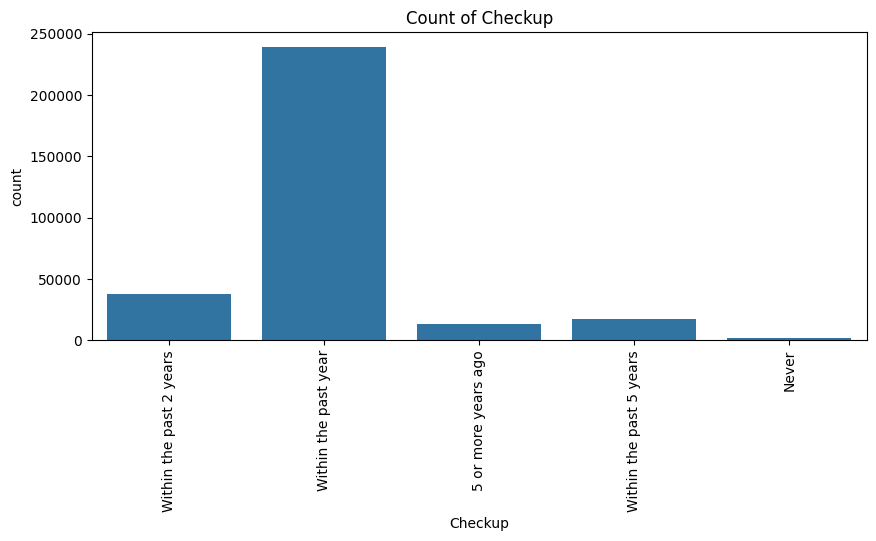

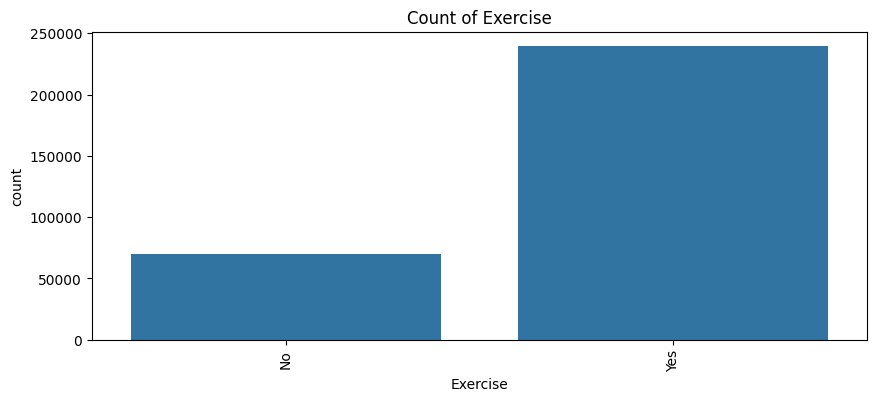

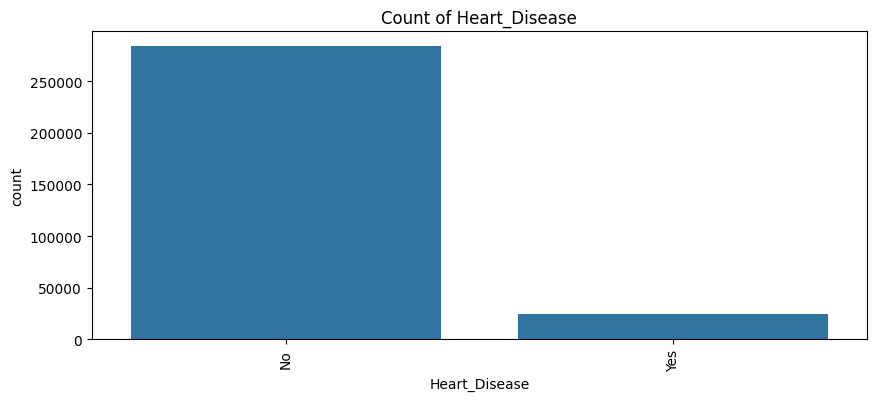

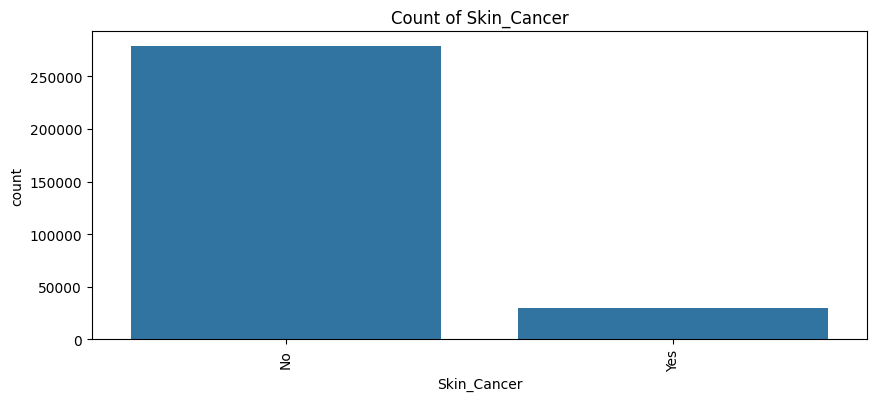

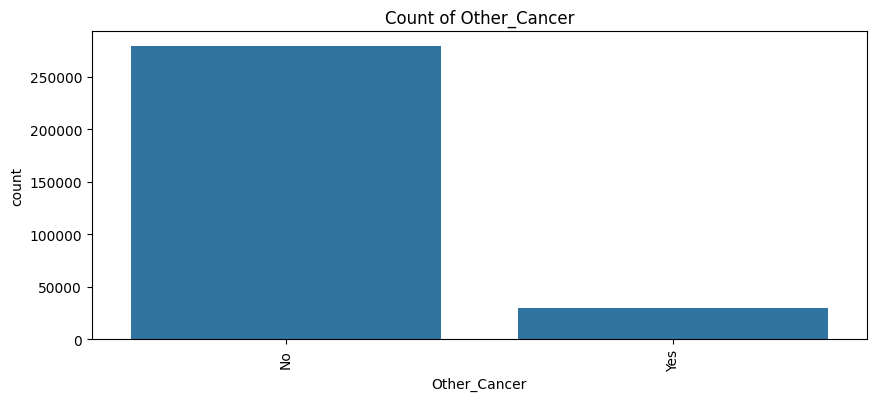

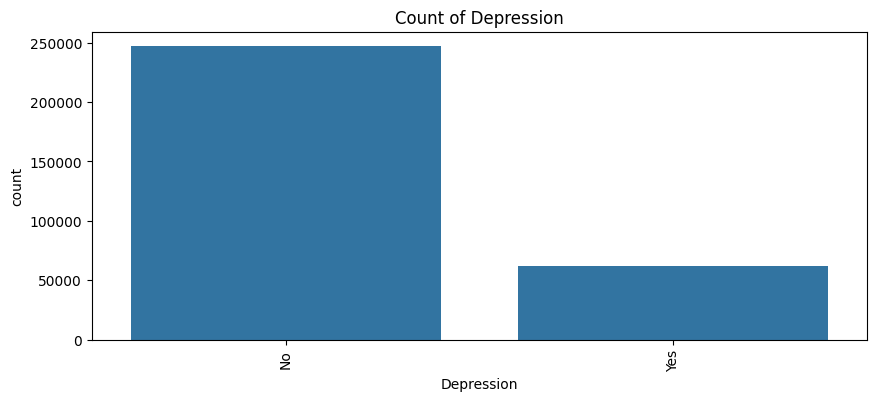

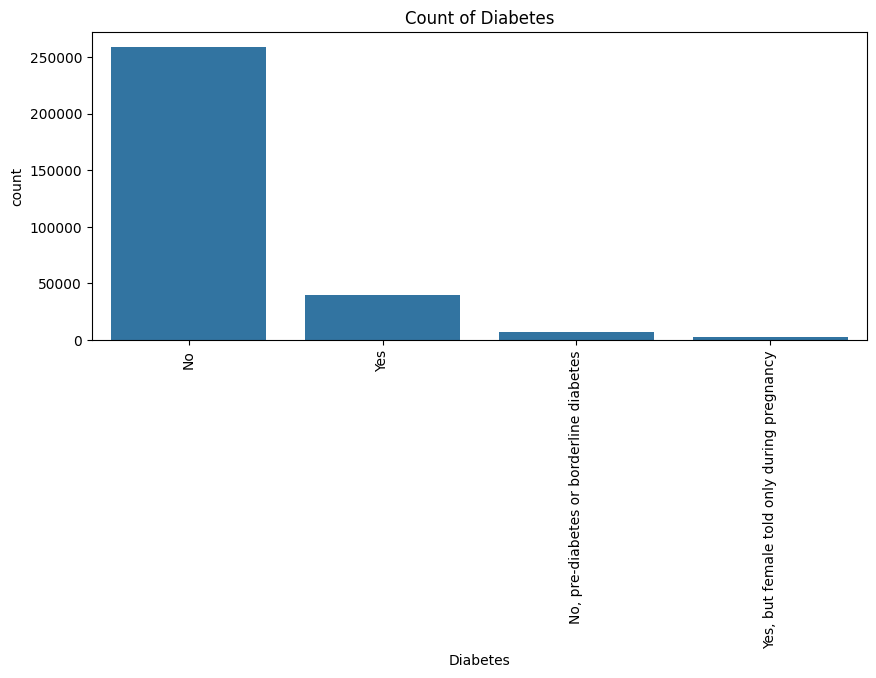

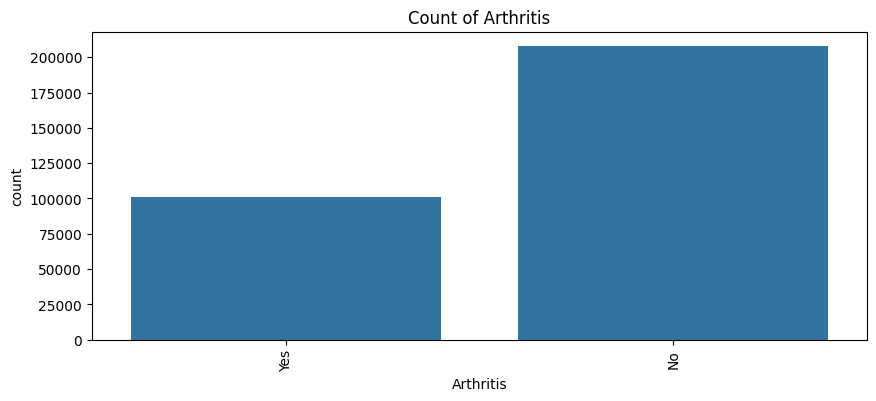

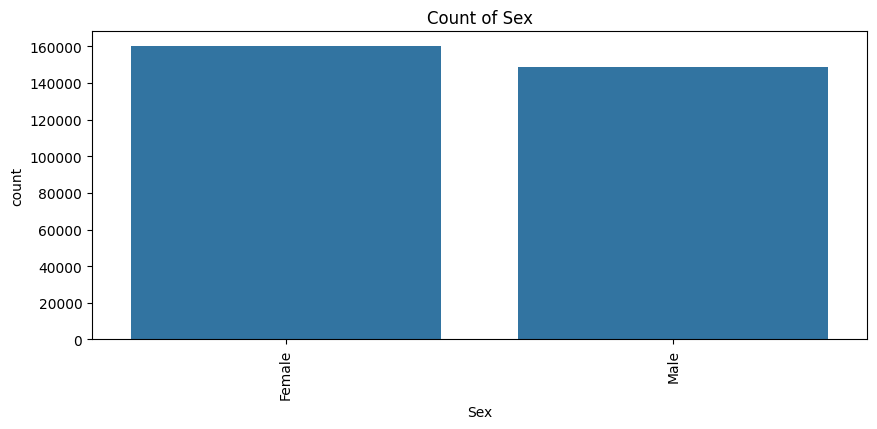

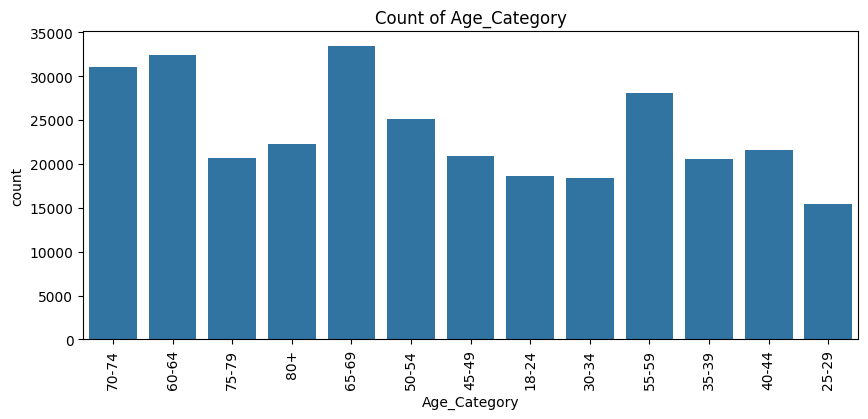

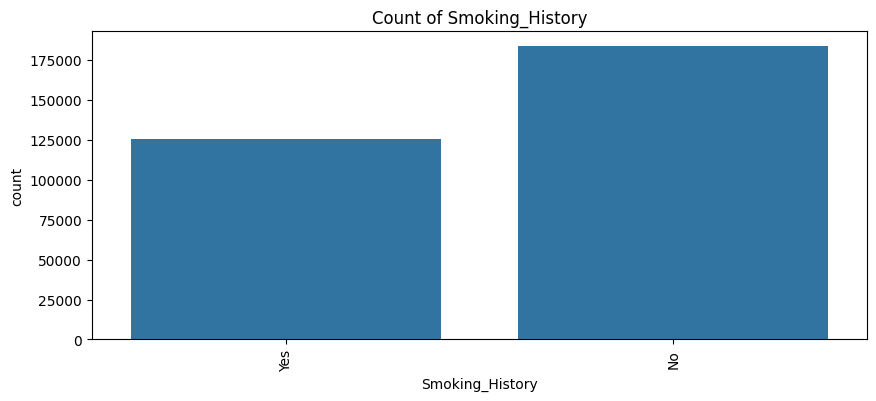

In [4]:
# Check the distribution of categorical features
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

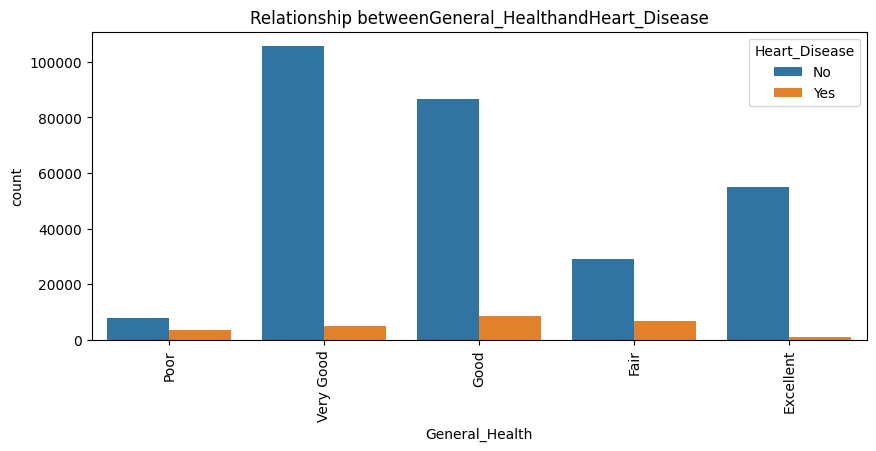

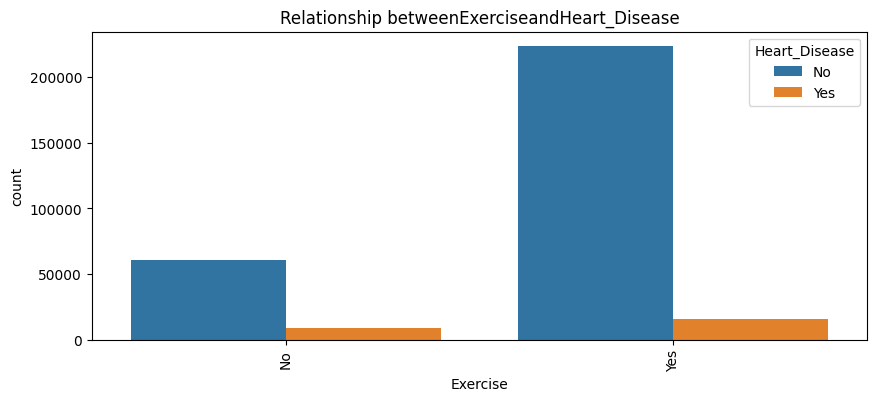

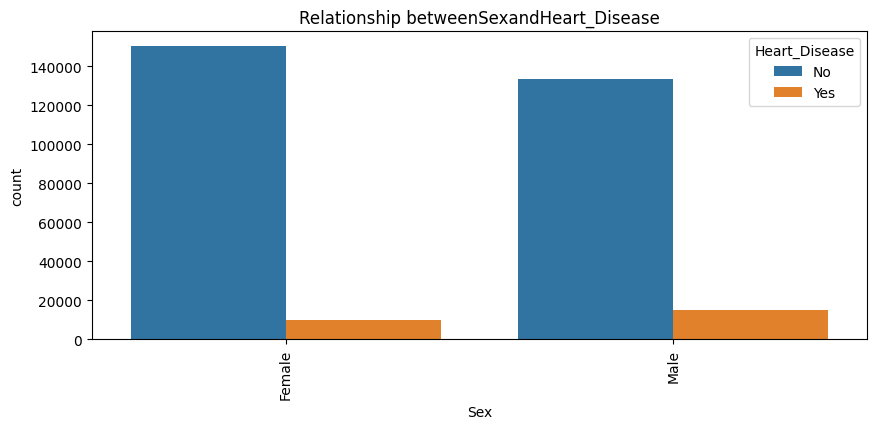

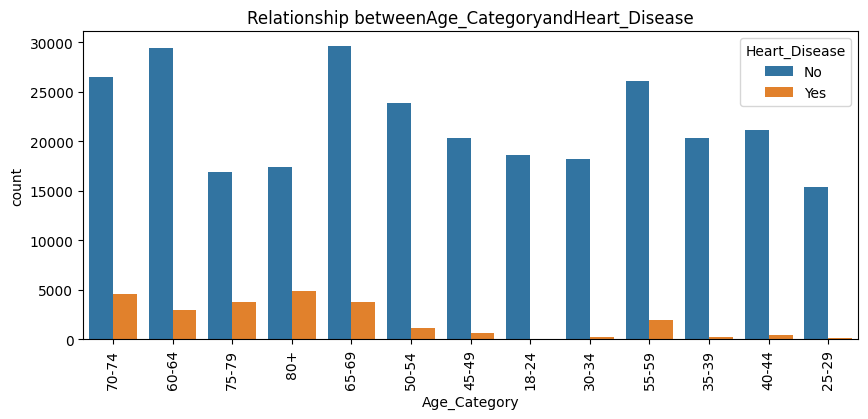

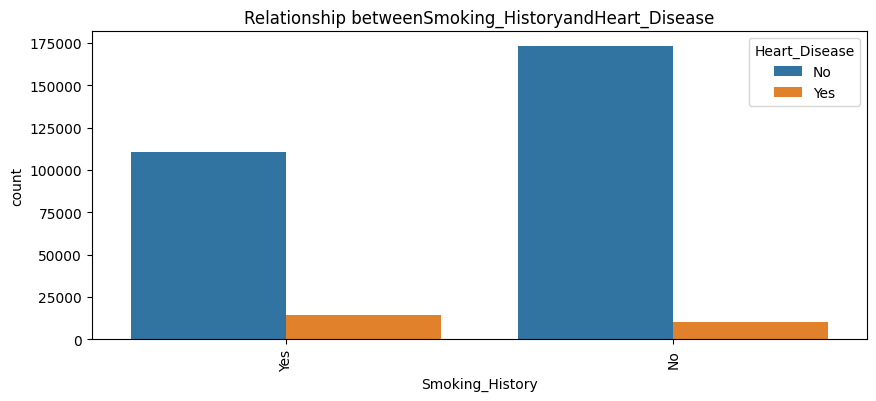

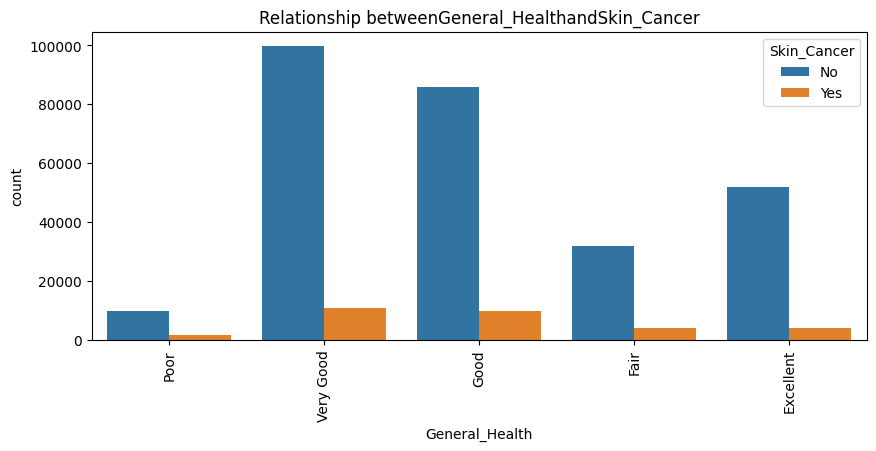

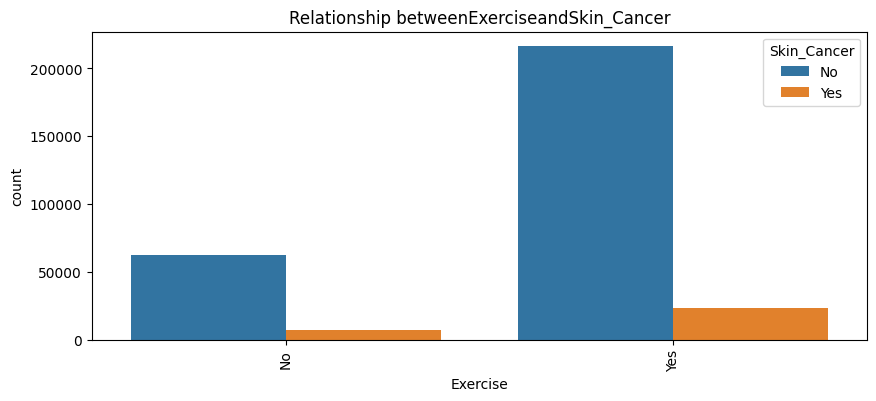

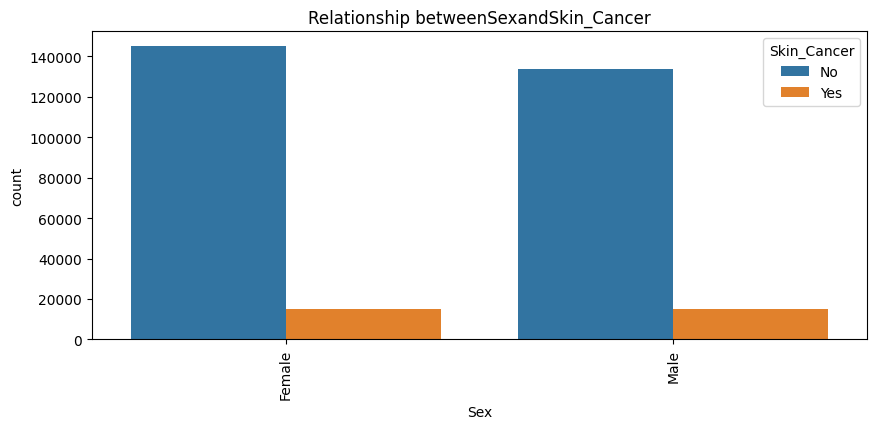

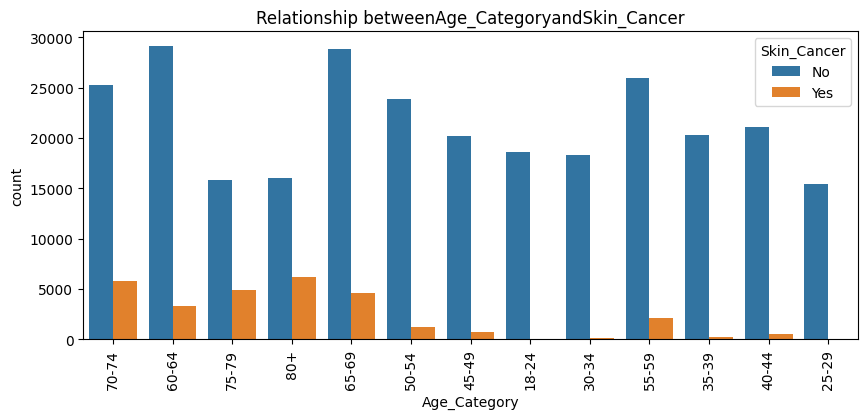

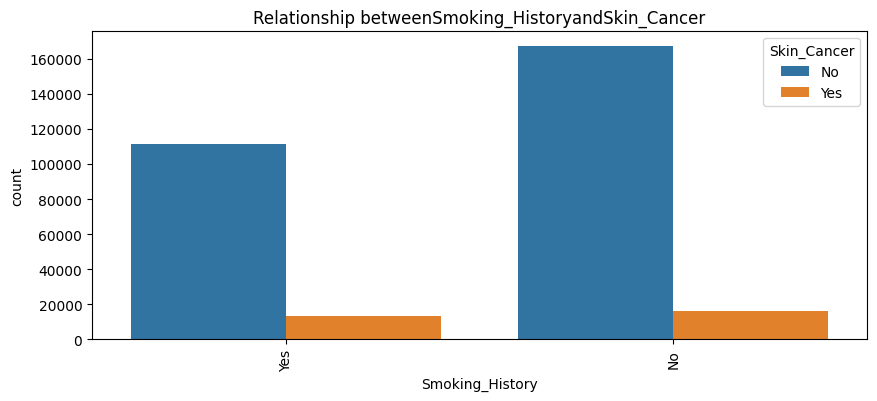

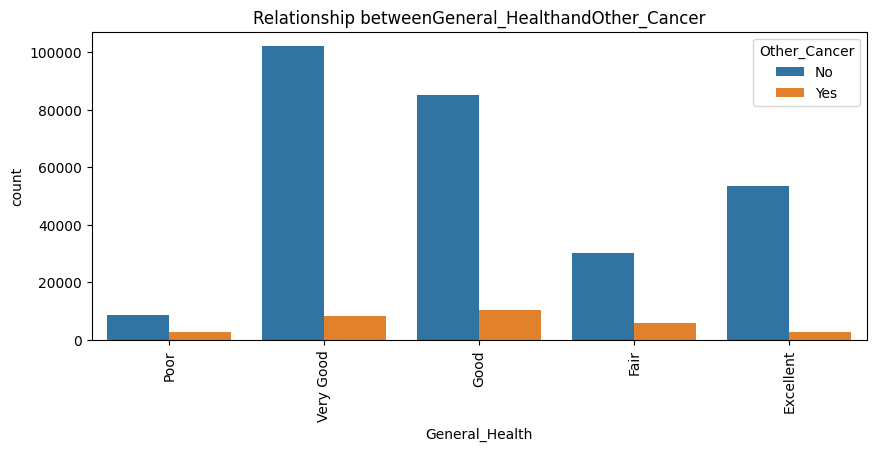

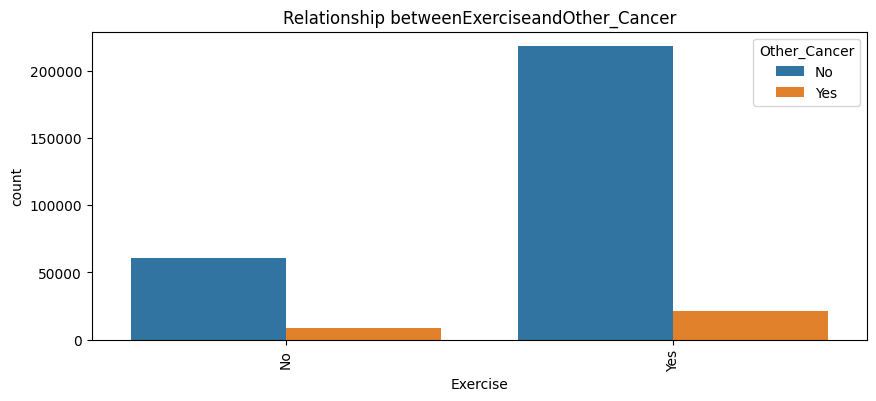

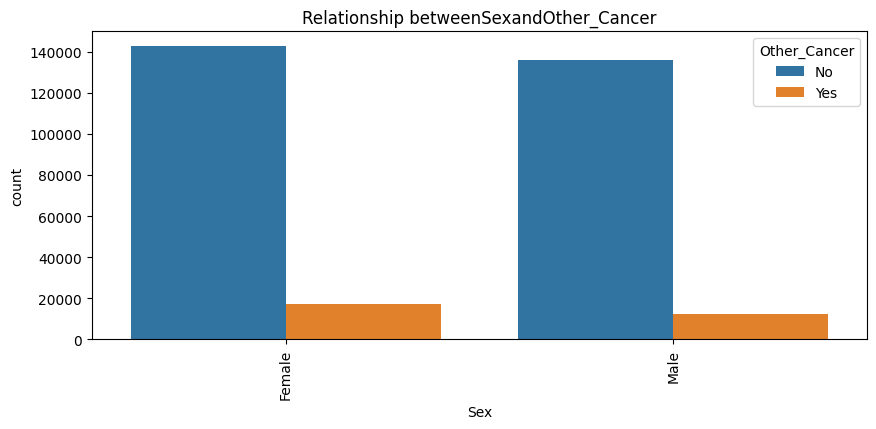

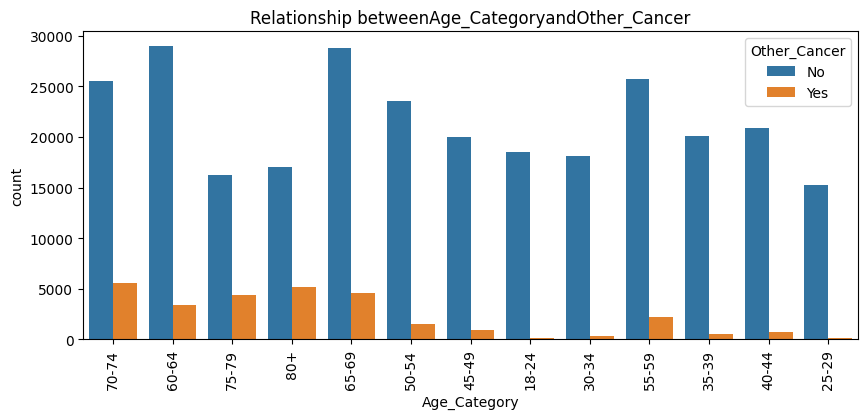

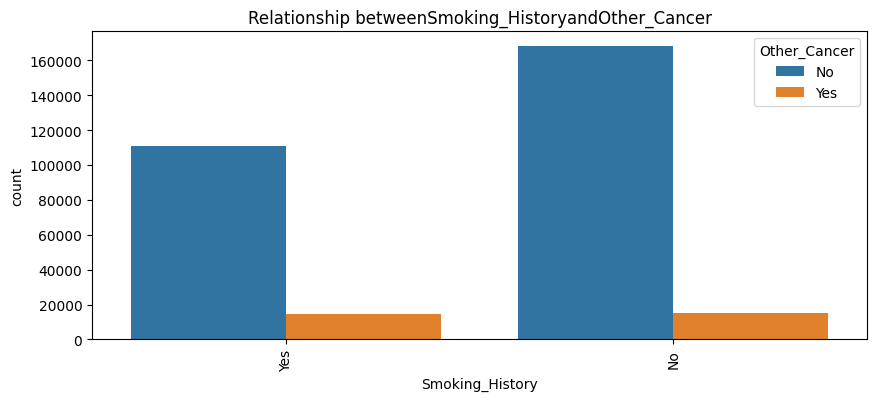

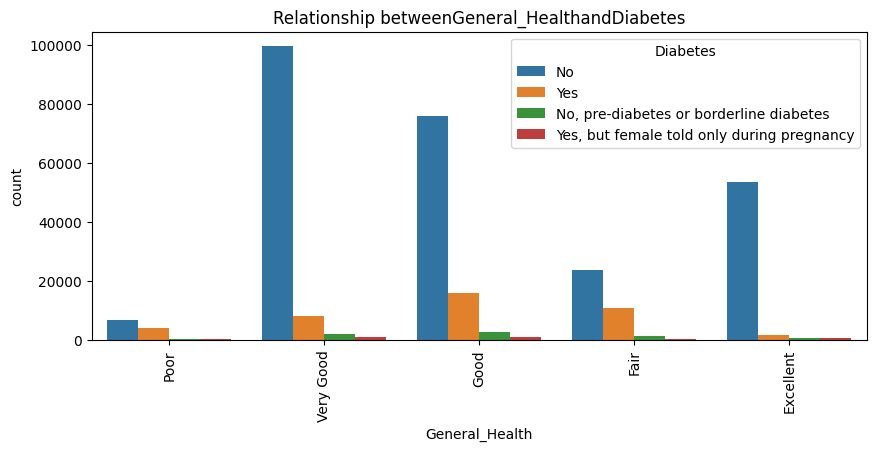

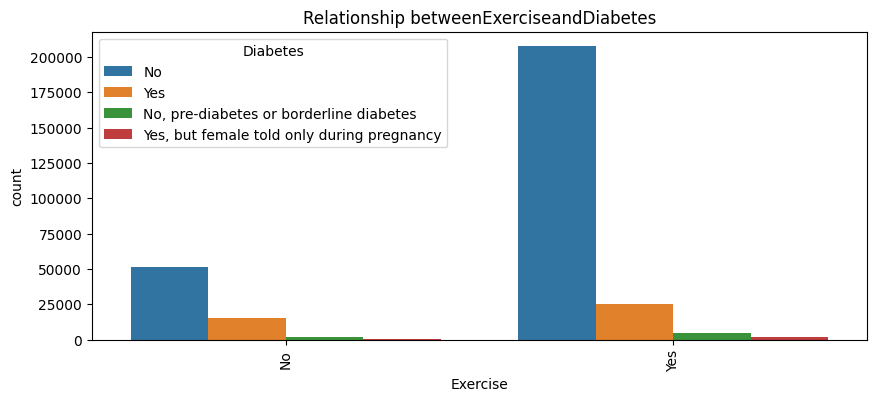

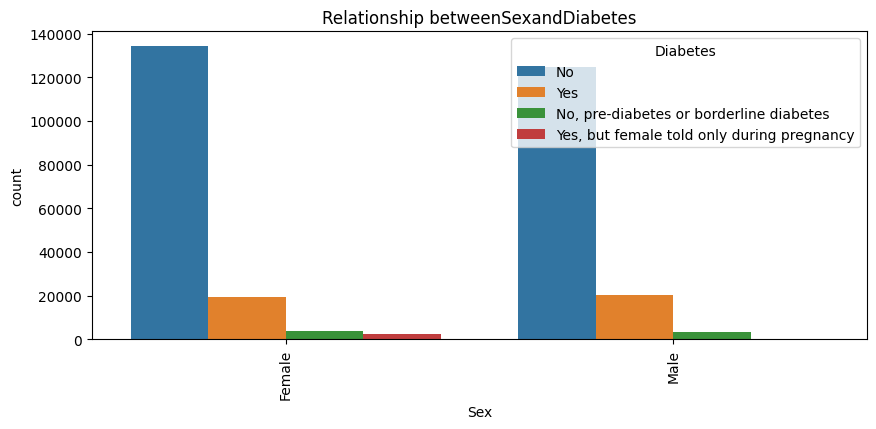

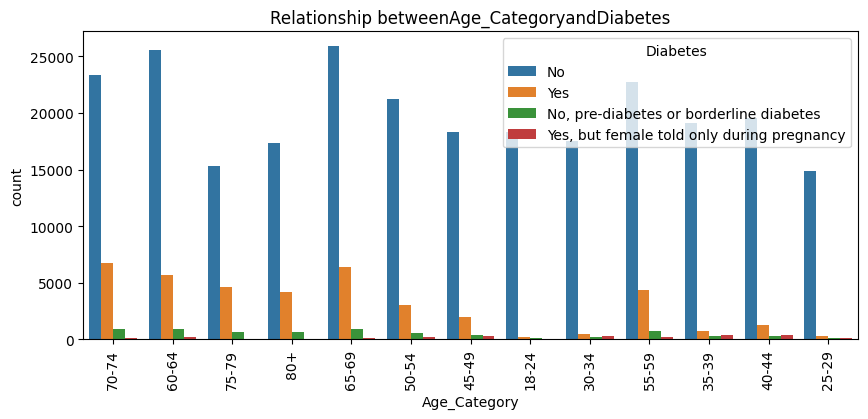

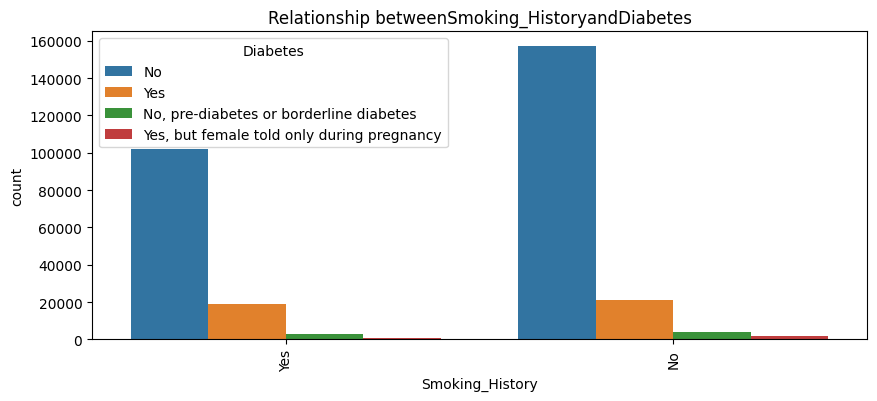

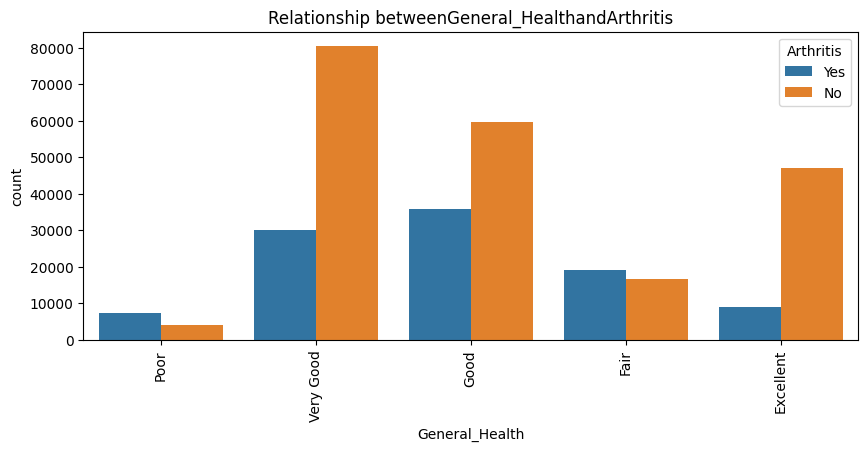

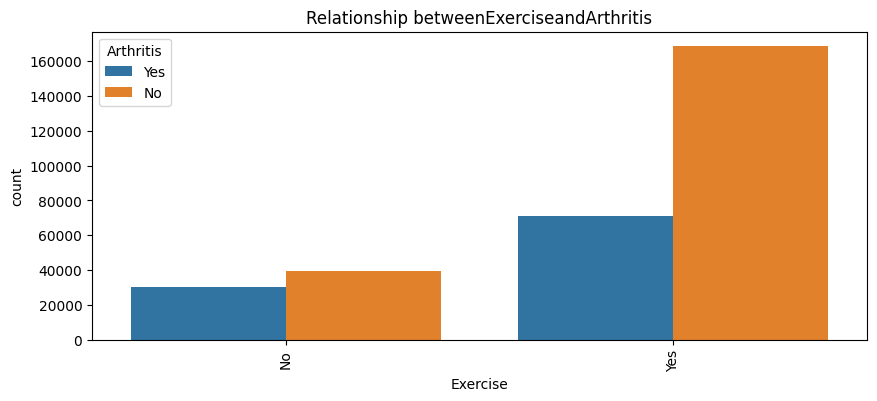

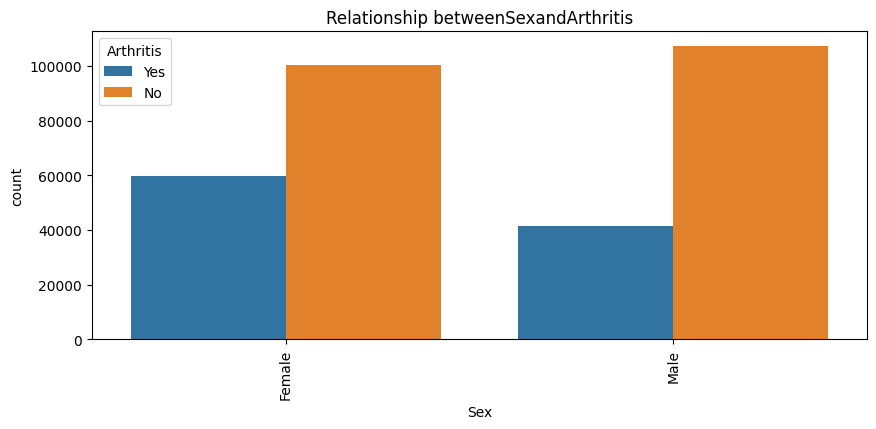

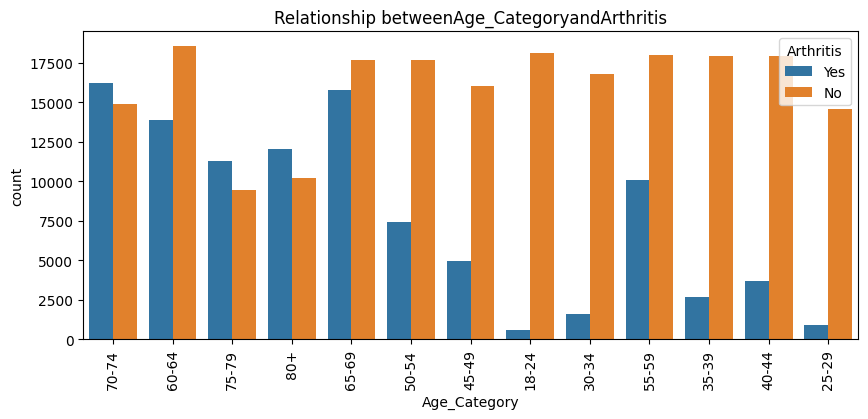

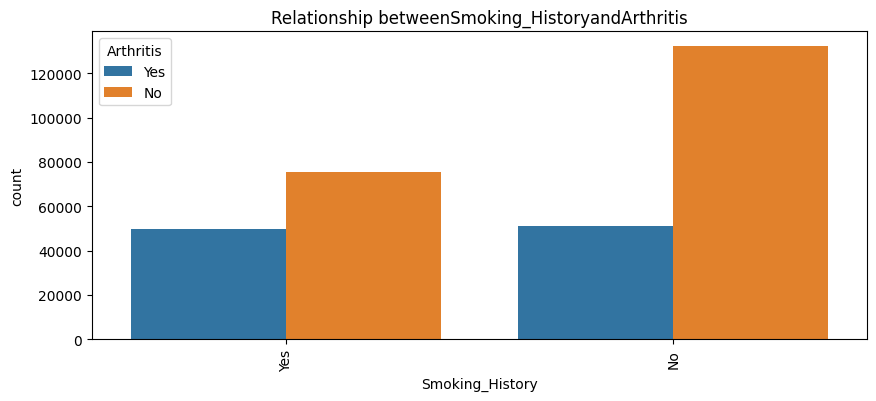

In [5]:
# bivariate analysis
# analyze the relationsip between the disease conditions and some selected variables
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']
for disease in disease_conditions:
  for variable in selected_variables:
    plt.figure(figsize=(10,4))
    sns.countplot(data=data, x=variable, hue=disease)
    plt.title('Relationship between' +variable+'and'+disease)
    plt.xticks(rotation=90)
    plt.show()

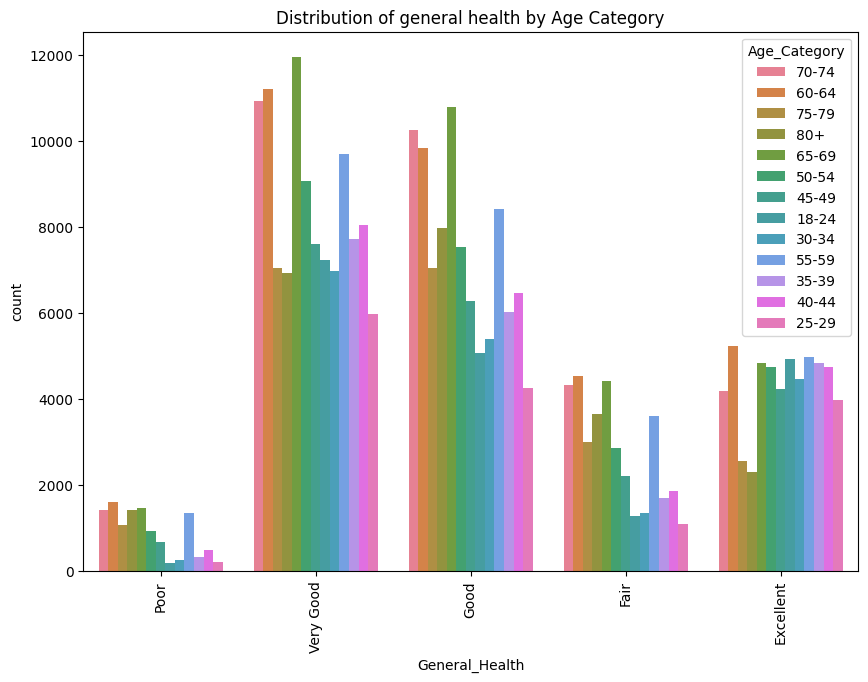

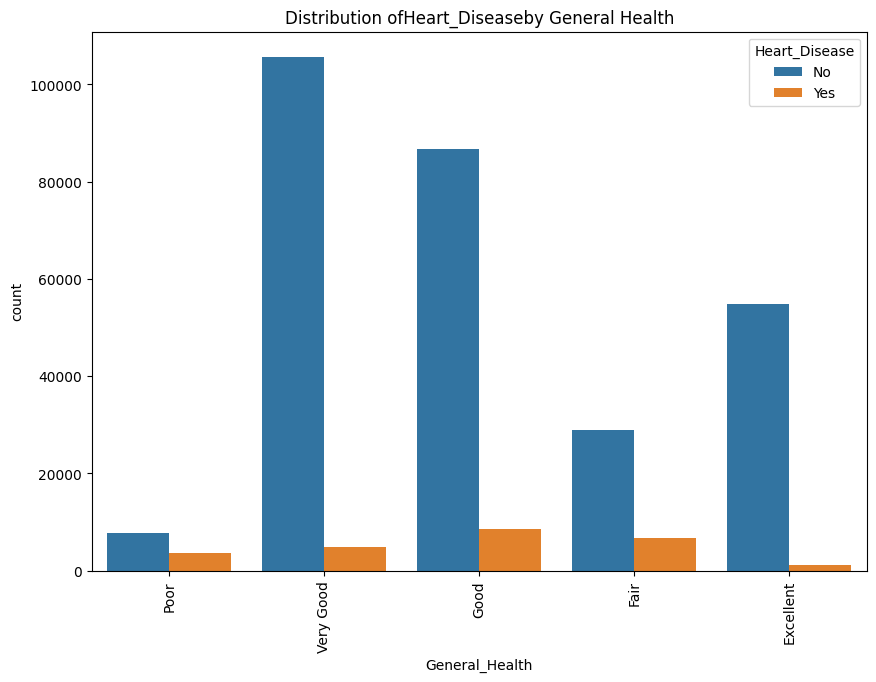

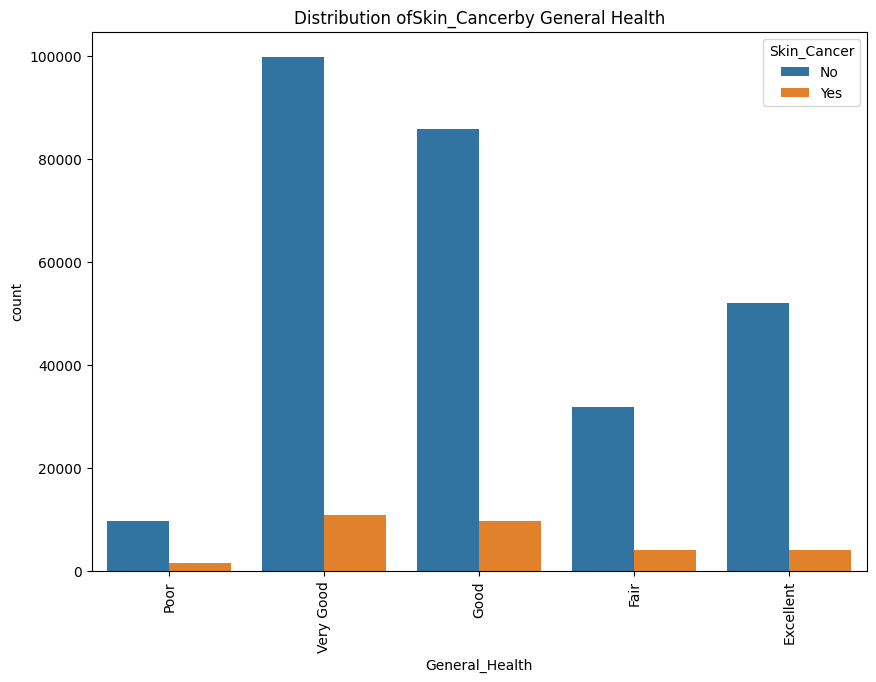

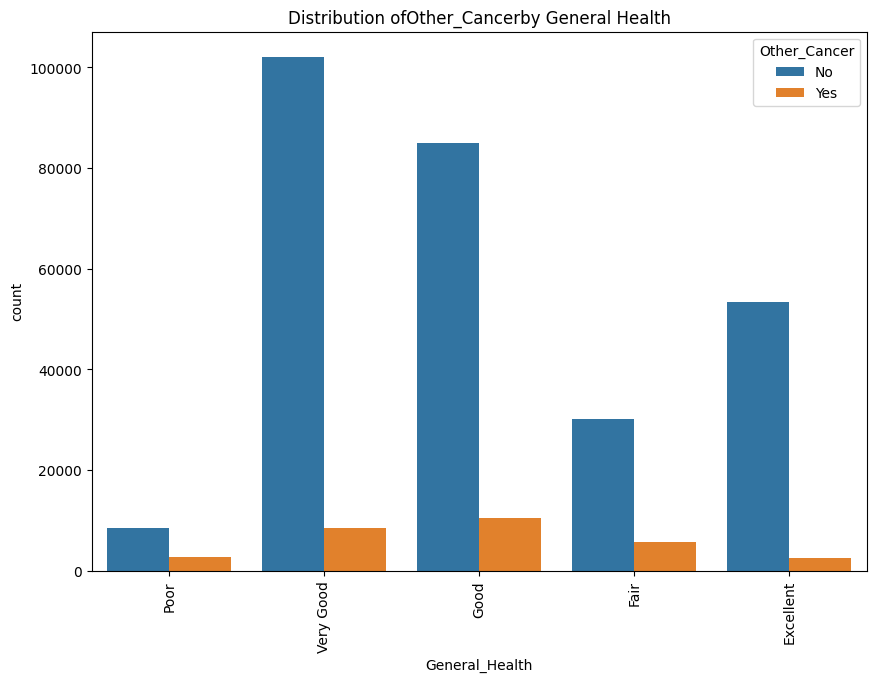

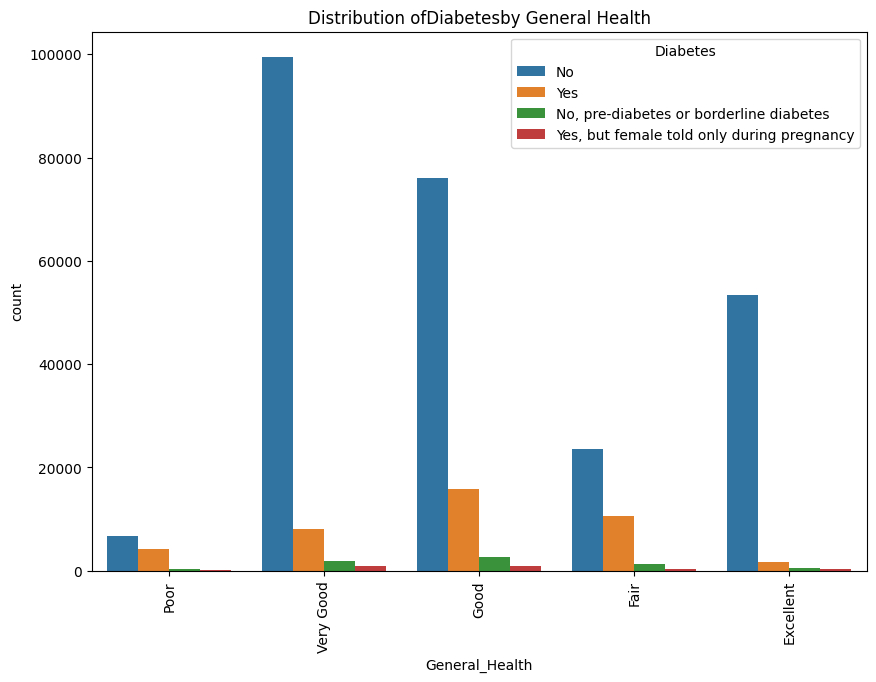

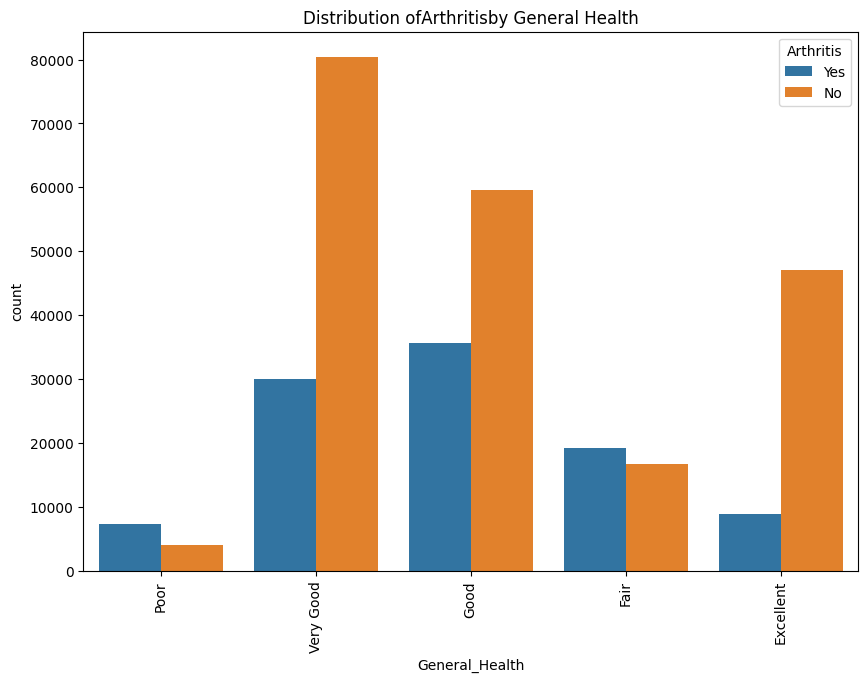

In [6]:
# multivariate analysis
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='General_Health', hue='Age_Category')
plt.title('Distribution of general health by Age Category')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
  plt.figure(figsize=(10,7))
  sns.countplot(data=data, x='General_Health', hue=disease)
  plt.title("Distribution of"+disease+'by General Health')
  plt.xticks(rotation=90)
  plt.show()

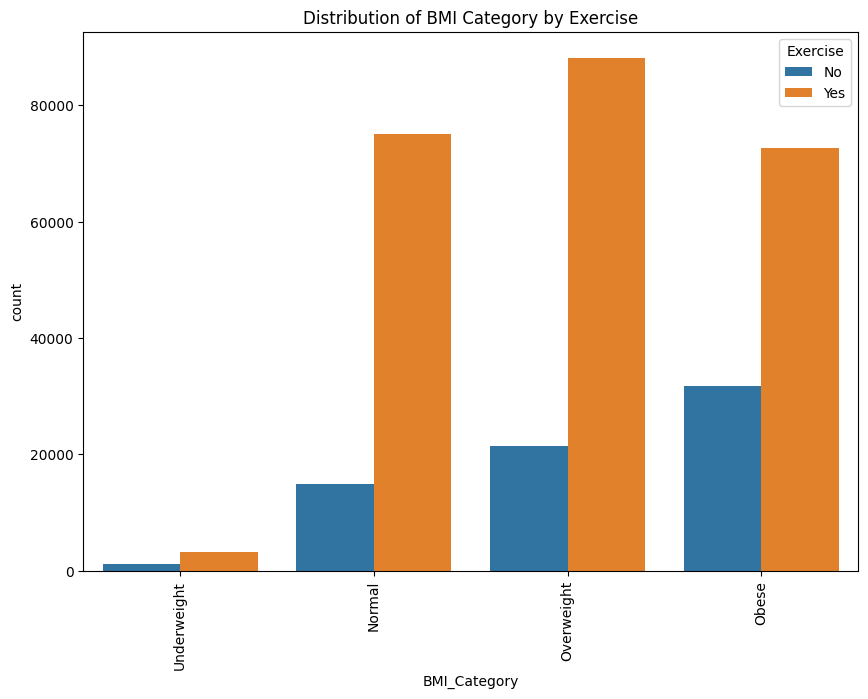

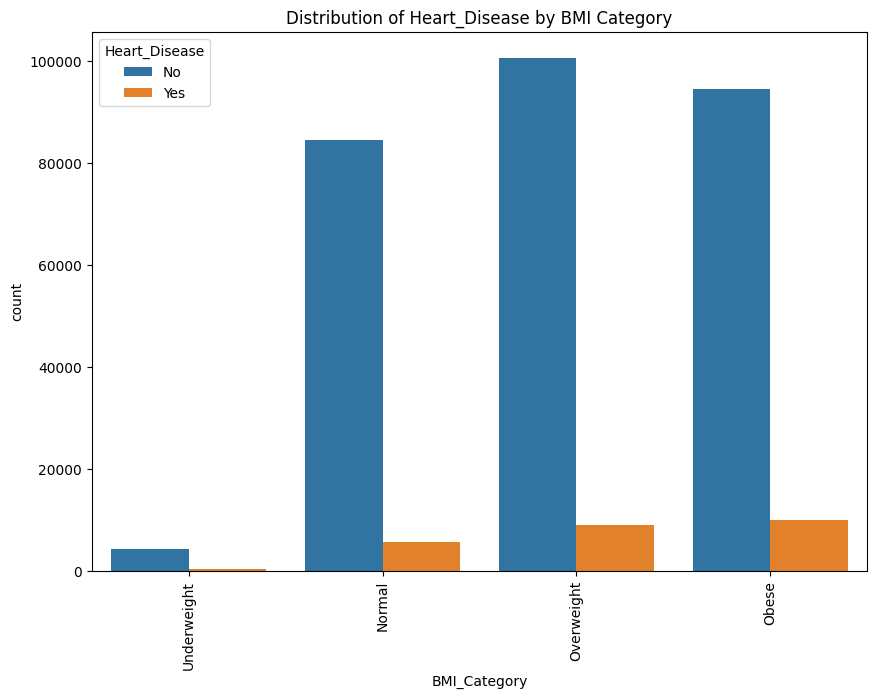

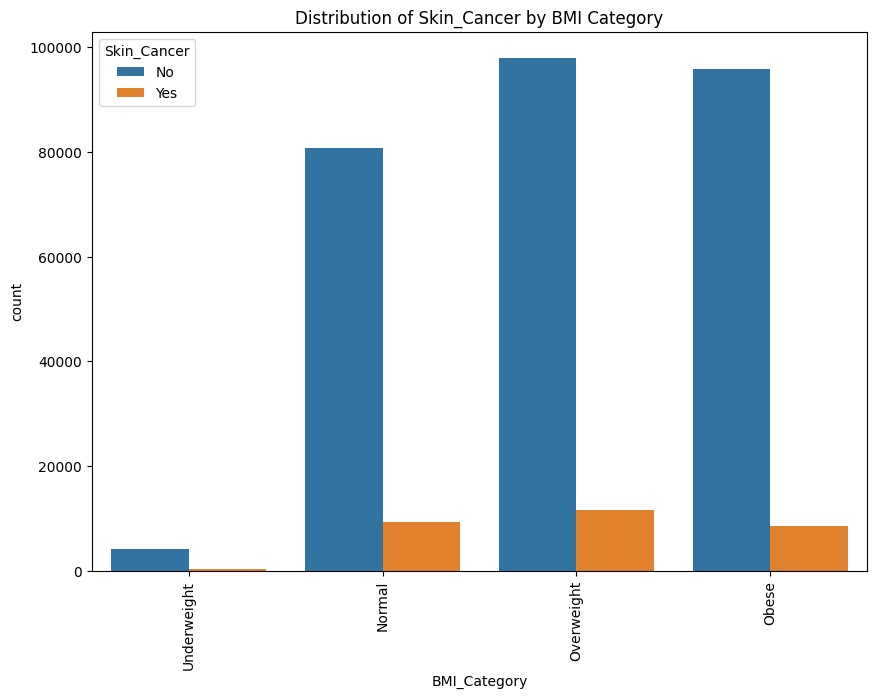

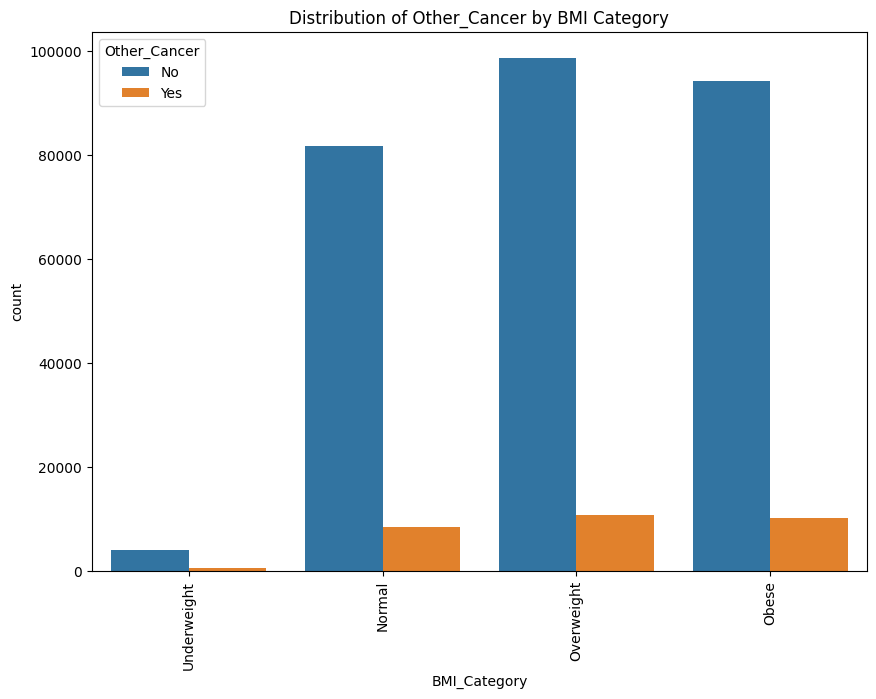

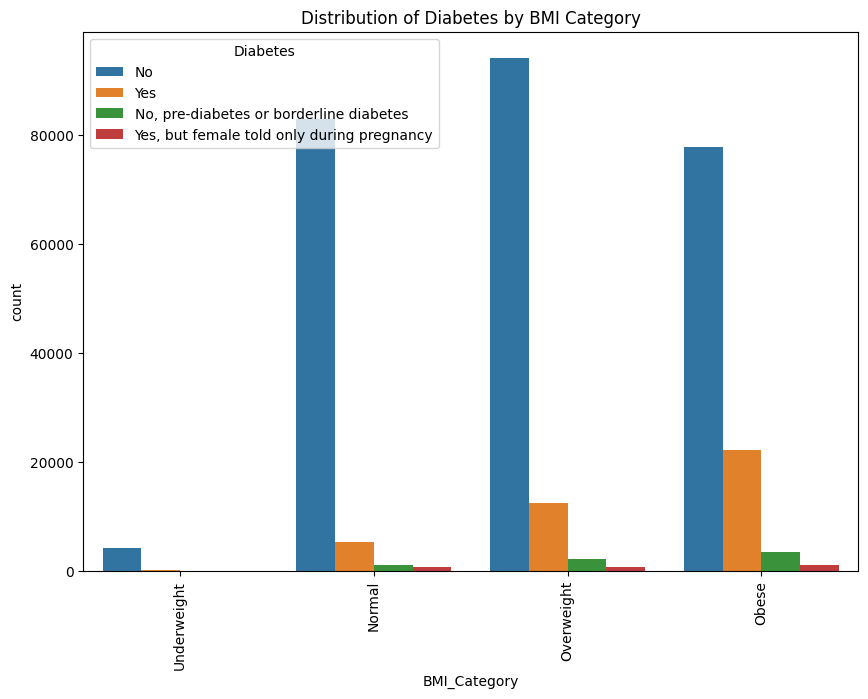

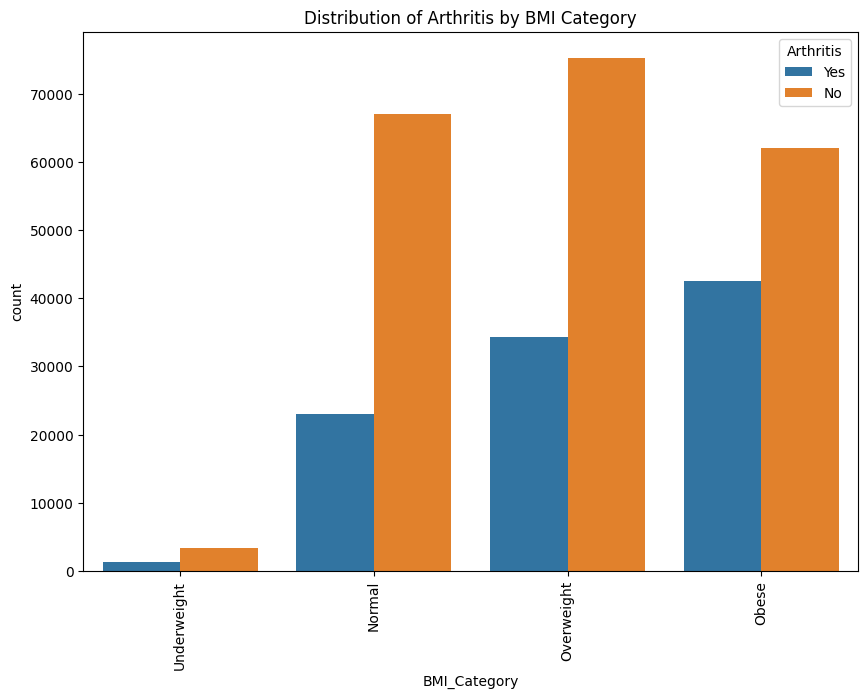

In [7]:
# Analyze the relationship between disease conditions, BMI, and exercise

# Creating a new BMI category
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='BMI_Category', hue='Exercise')
plt.title('Distribution of BMI Category by Exercise')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='BMI_Category', hue=disease)
    plt.title('Distribution of ' + disease + ' by BMI Category')
    plt.xticks(rotation=90)
    plt.show()

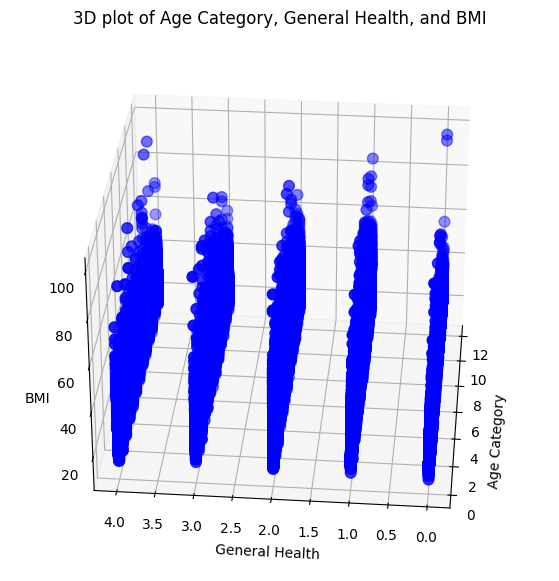

In [8]:
le = LabelEncoder()

# Selecting three features for 3D plot: Age_Category, General_Health, and BMI
data_3D = data[['Age_Category', 'General_Health', 'BMI']].copy()

# Encode the categorical variables
data_3D['Age_Category'] = le.fit_transform(data_3D['Age_Category'])
data_3D['General_Health'] = le.fit_transform(data_3D['General_Health'])

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3D['Age_Category'], data_3D['General_Health'], data_3D['BMI'], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age Category")
plt.ylabel("General Health")
ax.set_zlabel('BMI')
plt.title('3D plot of Age Category, General Health, and BMI')
plt.show()

# DATA PREPROCESSING

In [9]:
# re-import the dataset
data=pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')
# mapping for diabetes
diabetes_mapping={
    'No':0,
    'No, pre-diabetes or borderline diabetes ':0,
    'Yes, but female told only during pregnancy':1,
    'Yes':1

}
data['Diabetes']=data['Diabetes'].map(diabetes_mapping)
# one-hot encoding for sex
data=pd.get_dummies(data, columns=['Sex'])
binary_columns=['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']
for column in binary_columns:
  data[column]=data[column].map({'Yes': 1, 'No':0})

general_health_mapping={
    'Poor':0,
    'Fair':1,
    'Good':2,
    'Very Good':3,
    'Excellent':4
}
data['General_Health']=data['General_Health'].map(general_health_mapping)
checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4

}
data['Checkup'] = data['Checkup'].map(checkup_mapping)


age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)


# Display the first few rows of the cleaned dataset
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0.0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,True,False
1,3,4.0,0,1,0,0,0,1.0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,True,False
2,3,4.0,1,0,0,0,0,1.0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,True,False
3,0,4.0,1,1,0,0,0,1.0,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,False,True
4,2,4.0,0,0,0,0,0,0.0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,False,True


In [10]:
# remove duplicate rows
data=data.drop_duplicates()

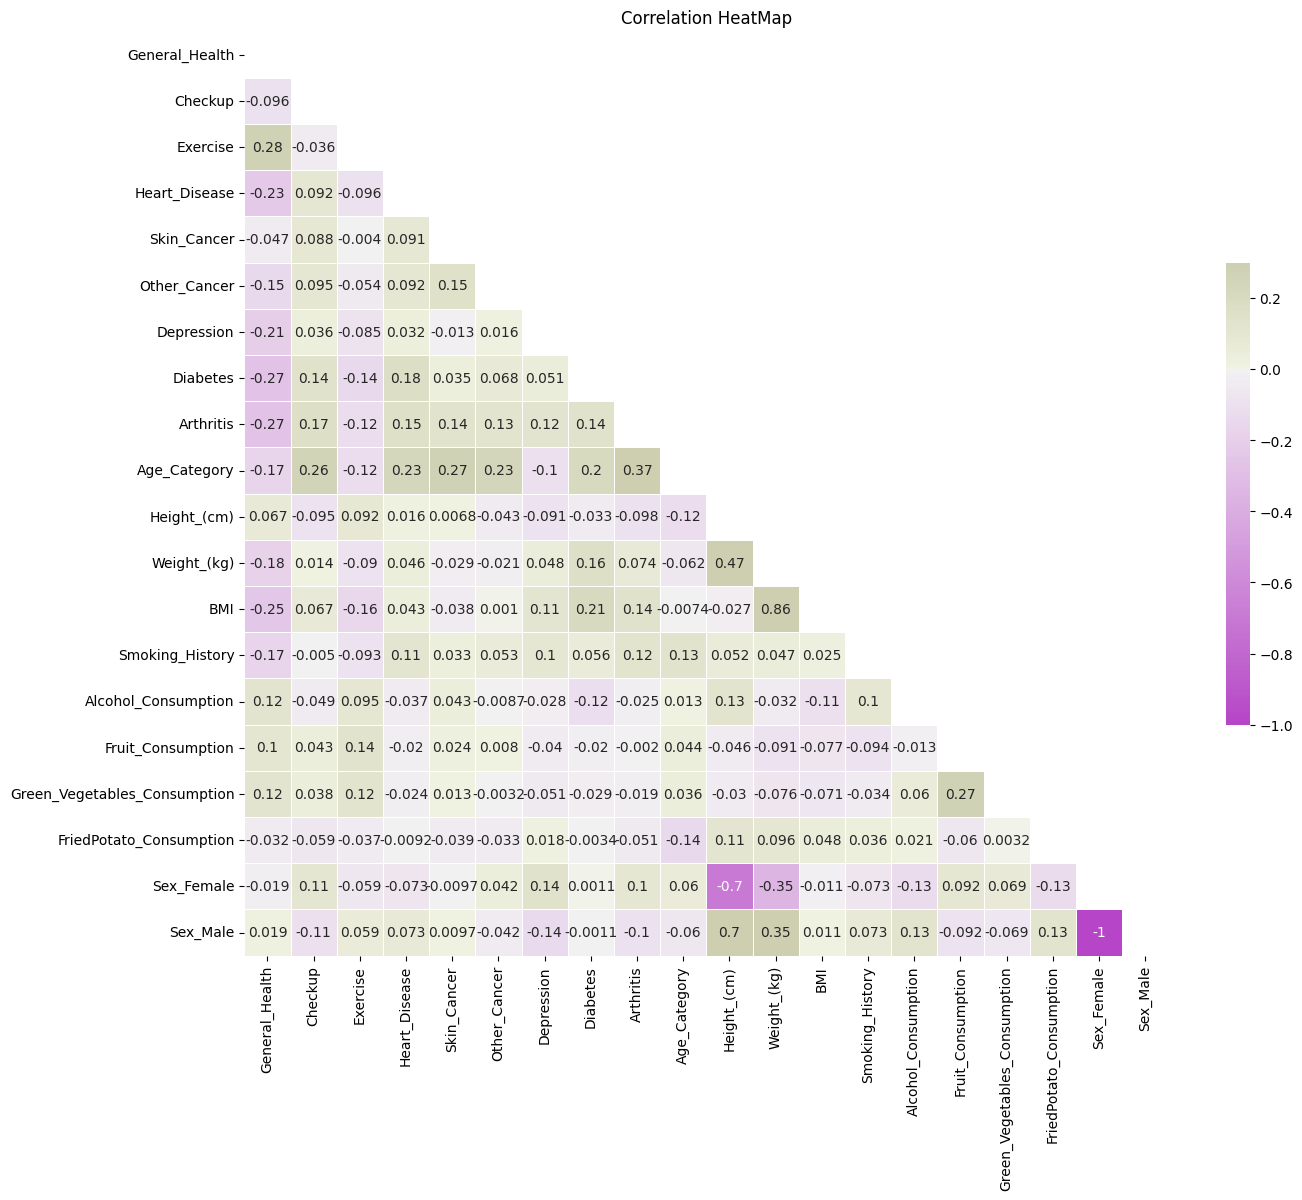

In [11]:
# correlation matrix
# compute a correlation matrix
corr=data.corr()
# generate a maskfor upper triangle
mask=np.triu(np.ones_like(corr, dtype=bool))
# set up the matplotlib figure
plt.figure(figsize=(15,12))
# generate a custom diverging colormap
cmap=sns.diverging_palette(300,90, as_cmap=True)
# draw the heatmap with mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={'shrink':.5}, annot=True)

plt.title('Correlation HeatMap')
plt.show()


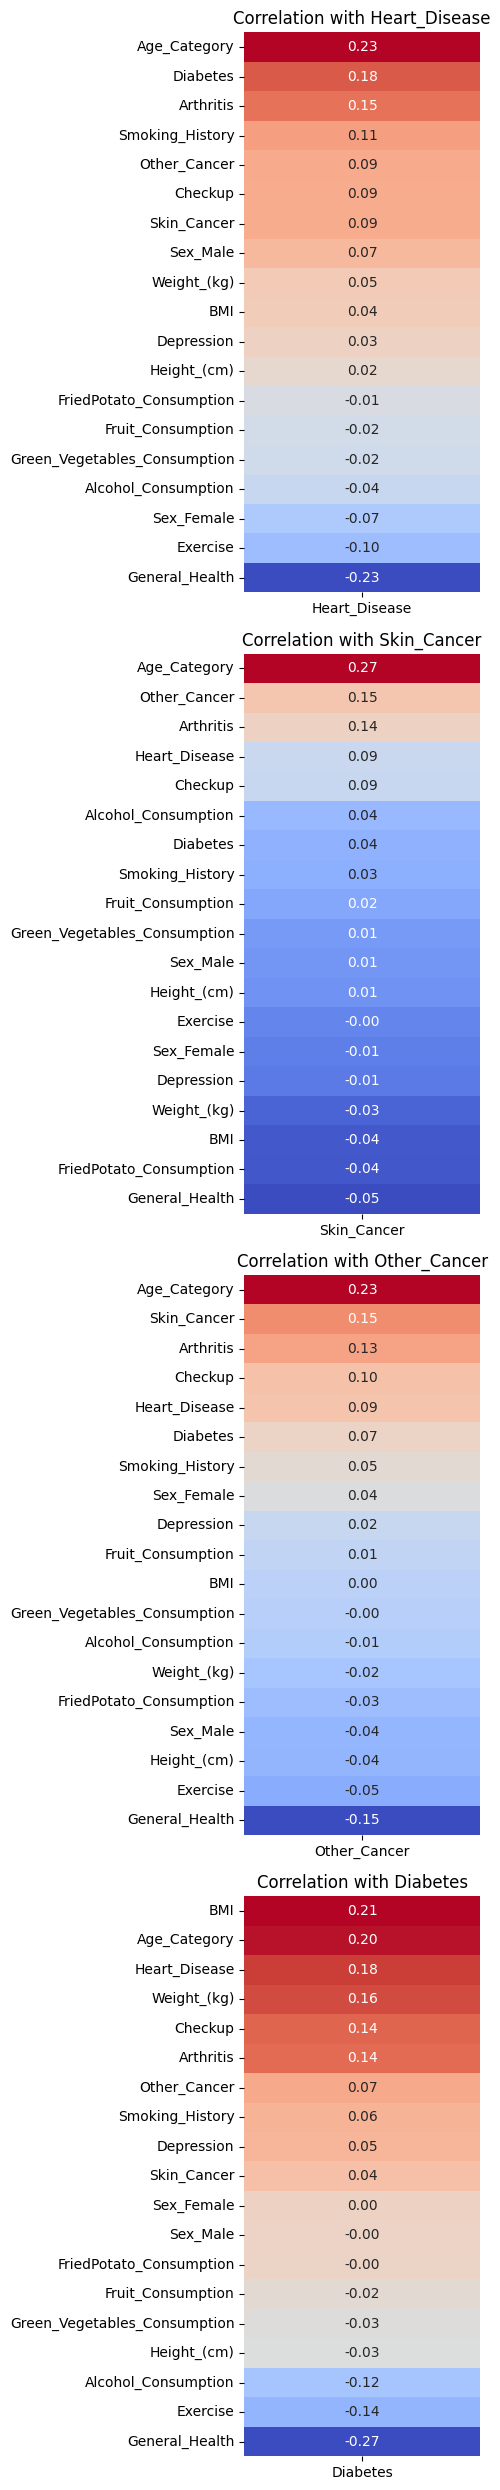

In [12]:
# Compute the correlation of each feature with the disease variables
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

# Compute the correlation matrix
corr = data.corr()

# Create a subplot for each disease
fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

In [13]:
# data cleaning
data=pd.read_csv('/content/drive/MyDrive/CVD_cleaned.csv')
# check for missinng values in each column
data.isnull().sum()


,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


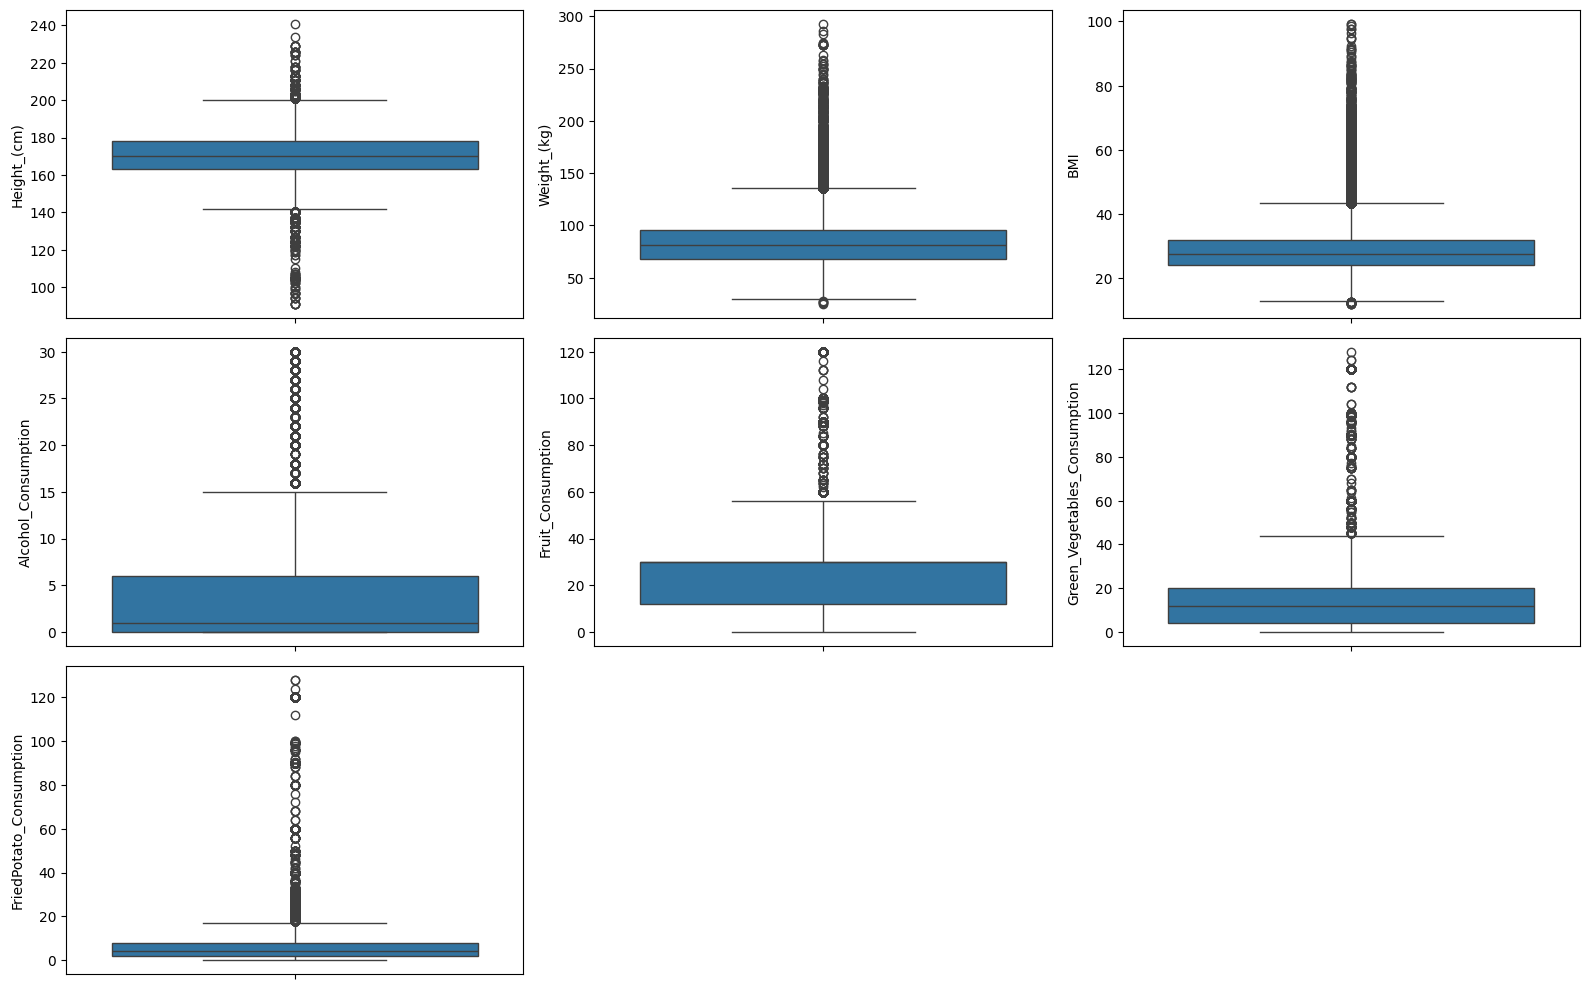

In [14]:
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                  'Fruit_Consumption', 'Green_Vegetables_Consumption',
                  'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])

plt.tight_layout()

In [15]:
# Summary statistics
summary_stats = data[numerical_cols].describe()
summary_stats

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [16]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


In [17]:
# Remove duplicate rows
data = data.drop_duplicates()

# DATA PREPARATION AND FEATURE ENGINEERING

In [18]:
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

# Health Checkup Frequency
checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
data['Checkup_Frequency'] = data['Checkup'].replace(checkup_mapping)

# Lifestyle Score
exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
data['Lifestyle_Score'] = data['Exercise'].replace(exercise_mapping) - data['Smoking_History'].replace(smoking_mapping) + data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['Alcohol_Consumption']/10

# Healthy Diet Score
data['Healthy_Diet_Score'] = data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['FriedPotato_Consumption']/10

# Interaction Terms
data['Smoking_Alcohol'] = data['Smoking_History'].replace(smoking_mapping) * data['Alcohol_Consumption']
data['Checkup_Exercise'] = data['Checkup_Frequency'] * data['Exercise'].replace(exercise_mapping)

# Ratio of Height to Weight
data['Height_to_Weight'] = data['Height_(cm)'] / data['Weight_(kg)']

# Fruit and Vegetables Consumption Interaction
data['Fruit_Vegetables'] = data['Fruit_Consumption'] * data['Green_Vegetables_Consumption']

# Healthy_Diet_Lifestyle Interaction
data['HealthyDiet_Lifestyle'] = data['Healthy_Diet_Score'] * data['Lifestyle_Score']

# Alcohol_FriedPotato Interaction
data['Alcohol_FriedPotato'] = data['Alcohol_Consumption'] * data['FriedPotato_Consumption']

**FEATURE PREPROCESSING**

In [21]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Check if 'Sex' column exists before applying get_dummies
if 'Sex' in data.columns:
    # One-hot encoding for Sex
    data = pd.get_dummies(data, columns=['Sex'])
else:
    print("Column 'Sex' not found in DataFrame. Skipping one-hot encoding.")


# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# Ordinal encoding for General_Health, Age_Category,BMI_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

# Fill NaN values with -1 before converting to integers
data['BMI_Category'] = data['BMI_Category'].map(bmi_mapping).fillna(-1).astype(int)


age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)


Column 'Sex' not found in DataFrame. Skipping one-hot encoding.


**GRADIENT BOOSTING**

In [27]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [28]:
# data pipeline
# Define the features and target
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

ZeroDivisionError: division by zero

In [31]:
# making a prediction
# Define the model with default hyperparameters
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]


ZeroDivisionError: division by zero